In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
with open('C:\\Users\\sjmif\\Downloads\\Termdata\\Assignment-2_Data.csv') as f:
    data = pd.read_csv(f)

In [3]:
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.dtypes

Id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [ ]:
data['y'].value_counts().reset_index()

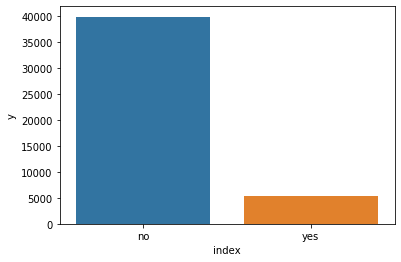

In [6]:
sns.barplot(x='index', y='y', data=data['y'].value_counts().reset_index())

### imbalaced labels

The chart above shows that there is a considerable difference in number of no labels than yes labels in the dataset. When doing classification models this typically has consequences that will become apparent later.

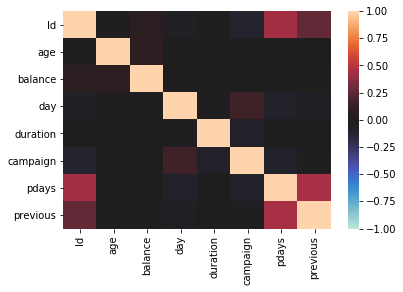

In [7]:
sns.heatmap(data.corr(), fmt='.1g', vmin=-1.0, vmax=1.0, center=0)
#correlation does not appear too severe in most features

#### Lets look at some quantile plots to look at the distribution of some of our variables


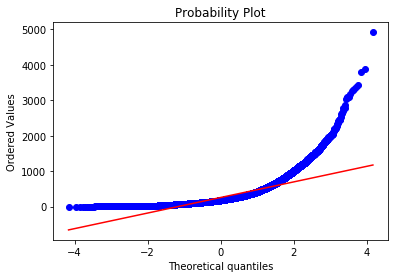

In [8]:
stats.probplot(data['duration'], dist='norm', plot=pylab)
pylab.show()

In [9]:
le=LabelEncoder()
le.fit(data['y'])
data['y']=le.transform(data['y'])
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [10]:
data['y'].value_counts().reset_index()

,index,y
0,0,39922
1,1,5289


In [11]:
data['y'].dtype

dtype('int32')

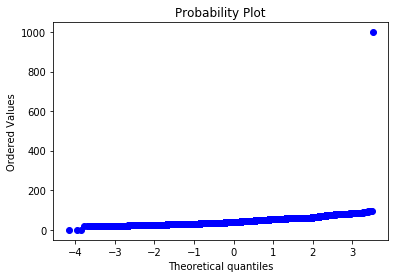

In [12]:
stats.probplot(data['age'], dist='norm', plot=pylab)
pylab.show()

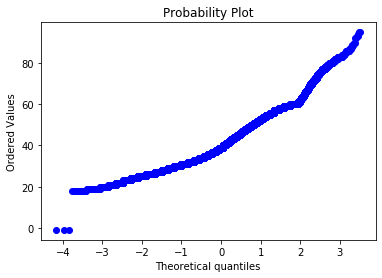

In [13]:
data=data.drop(labels=0, axis=0)
stats.probplot(data['age'], dist='norm', plot=pylab)
pylab.show()

#after removing obvious error we now are aware that some records appear to have age set to 0 which should be removed as well.

In [14]:
data.loc[data['age']<20]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30791,31792,19.0,student,single,unknown,no,1169.0,no,no,cellular,6,feb,463,18,-1,0,unknown,0
31041,32042,19.0,student,single,unknown,no,0.0,no,no,cellular,11,feb,123,3,-1,0,unknown,0
31263,32264,19.0,student,single,unknown,no,27.0,no,no,telephone,5,mar,86,12,-1,0,unknown,0
31304,32305,19.0,student,single,secondary,no,1803.0,no,no,cellular,10,mar,59,1,-1,0,unknown,0
31432,32433,19.0,student,single,primary,no,134.0,no,no,cellular,27,mar,271,2,-1,0,unknown,1
31492,32493,19.0,student,single,unknown,no,779.0,no,no,cellular,1,apr,184,4,-1,0,unknown,1
32169,33170,19.0,student,single,secondary,no,626.0,no,no,telephone,15,apr,117,1,-1,0,unknown,0
33774,34775,19.0,student,single,primary,no,1247.0,no,no,cellular,23,apr,94,1,-1,0,unknown,0
33789,34790,19.0,student,single,secondary,no,96.0,no,no,cellular,23,apr,106,3,-1,0,unknown,0
34281,35282,19.0,student,single,unknown,no,5368.0,no,no,cellular,4,may,77,6,-1,0,unknown,0


In [15]:
# Values clearly set to -1.0 not quite 0, however they should be removed or they should be changed somehow
# I would opt simply to remove them.
data=data.drop(labels=[45203,45204,45205], axis=0)

In [16]:
data.loc[data['age']==-1]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


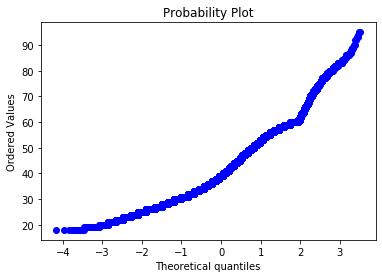

In [17]:
stats.probplot(data['age'], dist='norm', plot=pylab)
pylab.show()

#much nicer

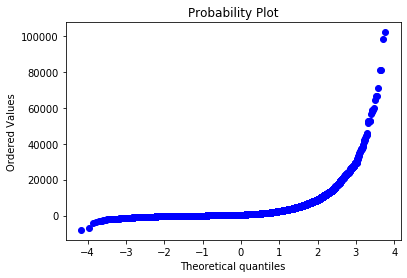

In [18]:
stats.probplot(data['balance'], dist='norm', plot=pylab)
pylab.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

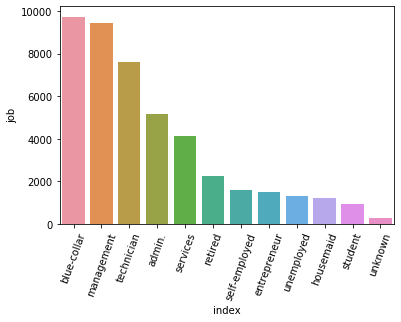

In [19]:
sns.barplot(x='index', y='job', data=data['job'].value_counts().reset_index())
plt.xticks(rotation=70)

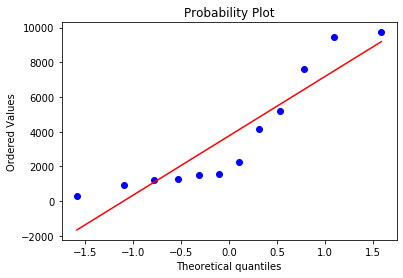

In [20]:
stats.probplot(data['job'].value_counts().reset_index()['job'], dist='norm', plot=pylab)
pylab.show()

In [21]:
data=data.drop(labels='Id',axis=1)

In [22]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [23]:
num_col=[]
for i,label in enumerate(data.columns):
    if data[label].dtype=='float64' or data[label].dtype=='int64':
        num_col.append(label)
num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [24]:
categ_col=[]
for i,label in enumerate(data.columns):
    if data[label].dtype=='object':
        categ_col.append(label)
categ_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [25]:
# Unfortunately in its current iteration sklearns decision tree classifier does not actually allow categorical input
# The categorical data will have to be one hot encoded, pd.get_dummies should handle this perfectly

In [26]:
data=pd.get_dummies(data)
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,44.0,29.0,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,2.0,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,1506.0,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33.0,1.0,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35.0,231.0,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
data.isna().any()

age                     True
balance                 True
day                    False
duration               False
campaign               False
pdays                  False
previous               False
y                      False
job_admin.             False
job_blue-collar        False
job_entrepreneur       False
job_housemaid          False
job_management         False
job_retired            False
job_self-employed      False
job_services           False
job_student            False
job_technician         False
job_unemployed         False
job_unknown            False
marital_divorced       False
marital_married        False
marital_single         False
education_primary      False
education_secondary    False
education_tertiary     False
education_unknown      False
default_no             False
default_yes            False
housing_no             False
housing_yes            False
loan_no                False
loan_yes               False
contact_cellular       False
contact_teleph

In [28]:
data.dropna(inplace=True)

In [29]:
dataX=data.drop(labels='y', axis=1)
dataY=data['y']

In [30]:
clf=DecisionTreeClassifier(random_state=0)
cross_val_score(clf, dataX, dataY, cv=10)

array([0.88230088, 0.64646018, 0.60309735, 0.60287611, 0.72433628,
       0.53827434, 0.68510732, 0.37618942, 0.5850852 , 0.4881611 ])

Notice, without manually selecting the tree depth it will create a giant mess of a tree.
Even with a reletively small dataset it takes a considerable amount of time to run the algorithm to create these trees.

As such a cutoff at a certain depth is very necessary.

In [31]:
clf=DecisionTreeClassifier(random_state=1, max_depth=3)
clf.fit(dataX, dataY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [32]:
from sklearn import tree

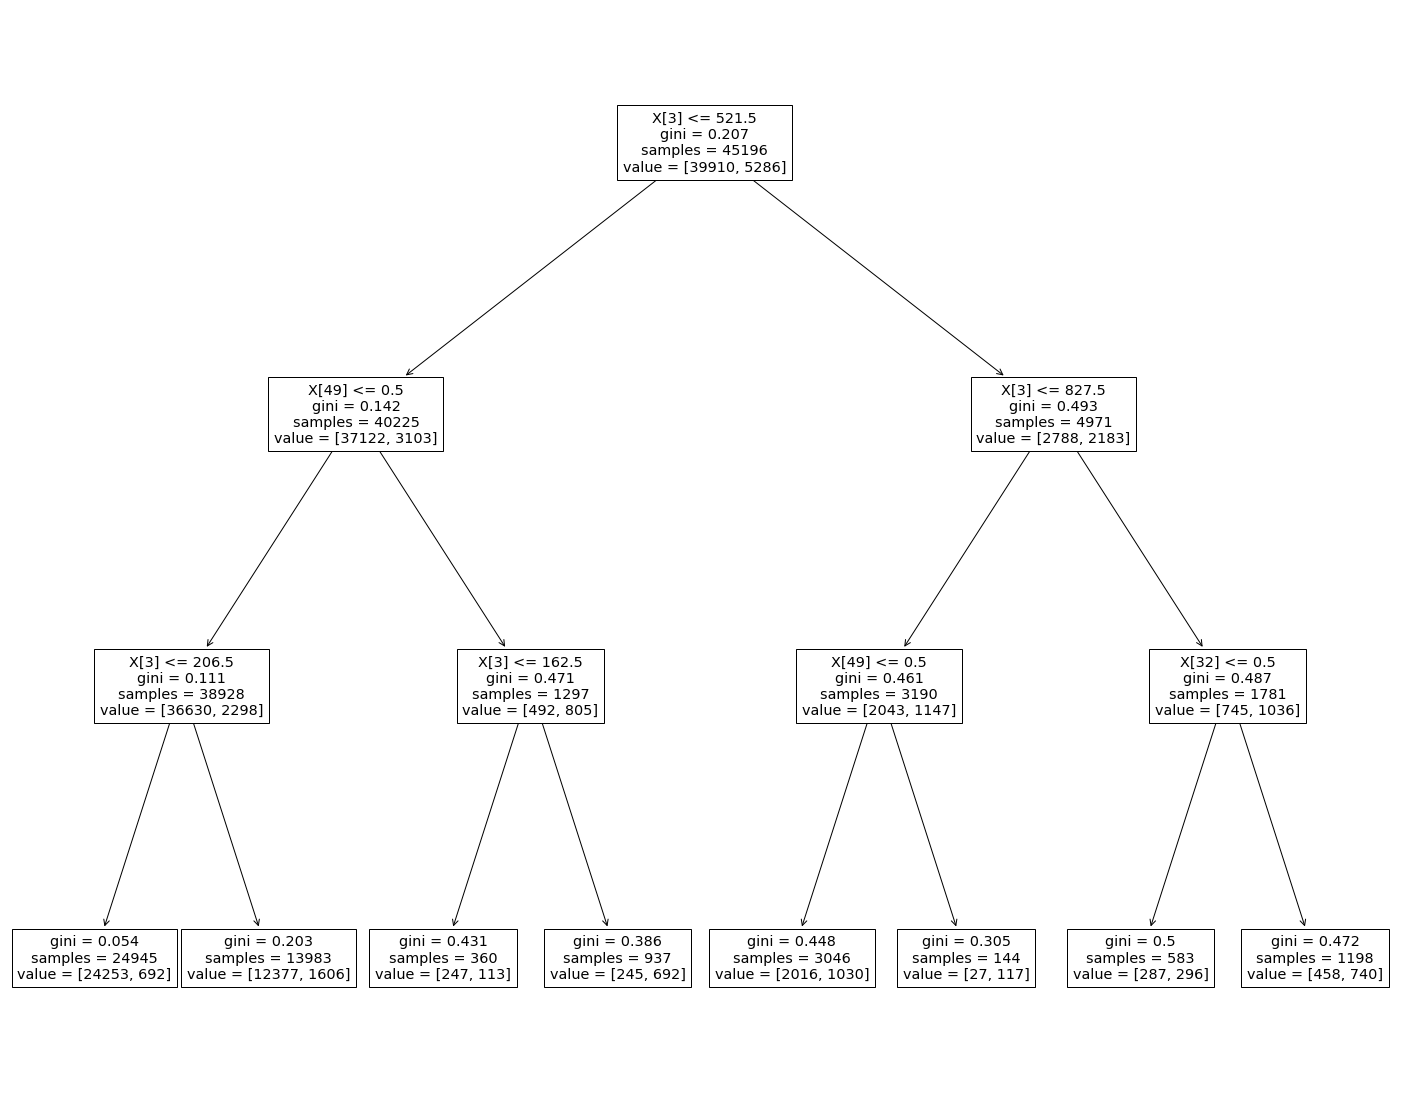

In [33]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

### Model Validation

This of course seems good in practice but we also want a way to validate the models effectivness and accuracy. So in reality before we do any fitting seen above. It is quite necessary to partition chunks of the dataset and set aside a small batch to test the models validity.

In [34]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(dataX, dataY, test_size=0.20, random_state=42)

In [47]:
clf2=DecisionTreeClassifier(random_state=3 ,max_depth=5)

In [48]:
clf2.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [49]:
print('training score:', clf2.score(xtrain, ytrain))
print('test score:', clf2.score(xtest, ytest))

training score: 0.9042205996238522
test score: 0.901216814159292


In [50]:
ypred=clf2.predict(xtest)

In [51]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
(tn, fp, fn, tp)

(7755, 202, 691, 392)

The confusion matrix here tells us the classifier tends to make a large number of type 2 errors or 'false negatives' which is really not ideal. Given how many 'no' labels there are compared to 'yes' labels this makes sense as our data is heavily imbalanced towards the 'no' label.

The confusion matrix here is quite important as our tests above show that the model is actually relatively accurate in its predictions, however because of the imbalance in data this metric is misleading.

This is actually a particular area of interest with the field of machine learning called 'cost sensitive learning'. In this case I would say incorrectly labelling a yes as a no is a more severe mistake than labelling a no as a yes. Sklearn actually has a parameter in certain classifiers including DecisionTreeClassifier that help to mitigate one error type while increasing the other.

In [57]:
clf3=DecisionTreeClassifier(random_state=3 ,max_depth=5, class_weight={0:1,1:5})

In [58]:
clf3.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=3, splitter='best')

In [59]:
print('training score:', clf3.score(xtrain, ytrain))
print('test score:', clf3.score(xtest, ytest))

training score: 0.7607036176568205
test score: 0.7570796460176992


In [60]:
ypred=clf3.predict(xtest)

In [61]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
(tn, fp, fn, tp)

(5900, 2057, 139, 944)

We see here that the models accuracy was reduced significantly, however from the confusion matrix we see that the type 2 errors have be reduced by a large magnitude while proportionally increasing type 1 error.

While the model is less accurate this might actually be a better for the purposes of determining which customers are more likely to be responsive to a certain marketing campaign for a banking product.